## Taller 2
### MINE-4101: Ciencia de Datos Aplicada

Nicolás Esteban Niño Vega - 202324436

In [637]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

import scipy.stats as stats

In [638]:
politicas1_df = pd.read_csv("./data/gapminder_final.csv", sep=",")

## 1. [20%] Entendimiento de los datos: 

In [639]:
politicas1_df.shape

(178, 16)

In [640]:
politicas1_df.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate
105,Ukraine,1036.830725,17.47,0.931169,39.9,5.584766e+09,49.400002,1.10,44.585355,68.494,0.255235,7.0,673.584861,18.954570,54.400002,67.98
172,Latvia,5011.219456,13.45,1.316432,44.3,1.257557e+08,50.700001,0.70,71.514724,73.339,NaN,8.0,904.669445,20.369590,56.799999,68.12
84,Venezuela,5528.363114,7.60,0.904025,34.3,5.418886e+09,45.799999,NaN,35.850437,74.402,1.214637,-3.0,969.004339,4.119620,59.900002,93.32
72,Kyrgyzstan,372.728414,4.72,0.837768,23.0,8.797067e+07,48.799999,0.30,19.582316,67.714,NaN,1.0,428.312307,9.875281,58.900002,36.28
118,Slovenia,12729.454400,14.94,1.160282,58.9,2.143680e+08,49.400002,0.06,69.339971,79.341,NaN,10.0,1585.174739,19.422610,55.900002,48.60


A continuación se presenta el tipo de dato asociado a cada columna del Dataset de datos junto con su cuenta de no-nulos:

In [641]:
politicas1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null    float64
 5   co2emissions          176 non-null    float64
 6   femaleemployrate      177 non-null    float64
 7   hivrate               155 non-null    float64
 8   internetuserate       174 non-null    float64
 9   lifeexpectancy        178 non-null    float64
 10  oilperperson          67 non-null     float64
 11  polityscore           167 non-null    float64
 12  relectricperperson    141 non-null    float64
 13  suicideper100th       178 non-null    float64
 14  employrate            177 non-null    float64
 15  urbanrate             1

In [642]:
#Proporción de valores nulos
politicas1_df.isna().sum()/len(politicas1_df)

country                 0.000000
incomeperperson         0.016854
alcconsumption          0.000000
armedforcesrate         0.022472
breastcancerper100th    0.005618
co2emissions            0.011236
femaleemployrate        0.005618
hivrate                 0.129213
internetuserate         0.022472
lifeexpectancy          0.000000
oilperperson            0.623596
polityscore             0.061798
relectricperperson      0.207865
suicideper100th         0.000000
employrate              0.005618
urbanrate               0.000000
dtype: float64

Se divisan problemas de completitud con las columnas oilperperson (62.35%), relectricperperson (20.70%) y hivrate con 12.92%.

### Top 5 de indicadores que describen a entender el PIB: 
employrate, incomeperperson, lifeexpectancy, polityscore y alcconsumption

In [643]:
features = ["employrate", "incomeperperson", "lifeexpectancy", "polityscore", "alcconsumption"]

### Análisis univariado y multivariado del top 5 de indicadores

In [644]:
politicas1_df["employrate"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    177.000000
mean      58.854237
std       10.334804
min       34.900002
5%        41.920000
25%       51.400002
50%       58.799999
75%       65.000000
95%       78.199997
max       83.199997
Name: employrate, dtype: float64

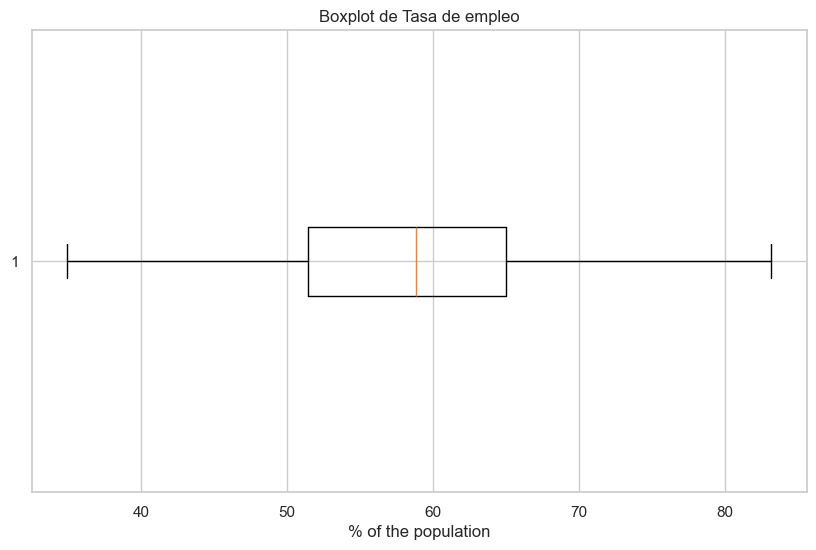

In [645]:
plt.figure(figsize=(10, 6))
plt.boxplot(politicas1_df["employrate"].dropna(), vert=False)
plt.title("Boxplot de Tasa de empleo")
plt.xlabel("% of the population")
plt.show()

Además de el problema leve de completitud descrito anteriormente (1 entradas nulas) no existen outliers o problemas de consistencia en esta variable numérica. Todos las entradas cuentan con valores que tienen sentido.

In [646]:
politicas1_df["incomeperperson"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count      175.000000
mean      7553.392250
std      11074.571742
min        103.775857
5%         241.729899
25%        609.744287
50%       2425.471293
75%       8880.432039
95%      32954.632381
max      52301.587180
Name: incomeperperson, dtype: float64

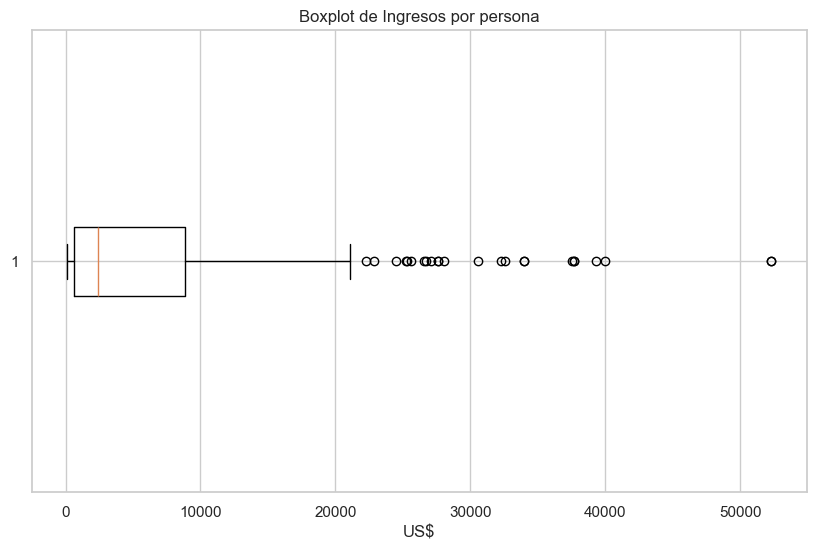

In [647]:
plt.figure(figsize=(10, 6))
plt.boxplot(politicas1_df["incomeperperson"].dropna(), vert=False)
plt.title("Boxplot de Ingresos por persona")
plt.xlabel("US$")
plt.show()

Aunque existen outliers considerables para esta variable, sin embargo, se debe tener en cuenta que a priori que el ingreso por persona s clave para la prediccion de nuestra variable en pro de mejora del PIB

In [648]:
politicas1_df["lifeexpectancy"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    178.000000
mean      69.414949
std        9.808335
min       47.794000
5%        50.136100
25%       62.725000
50%       72.974000
75%       76.127500
95%       81.409250
max       83.394000
Name: lifeexpectancy, dtype: float64

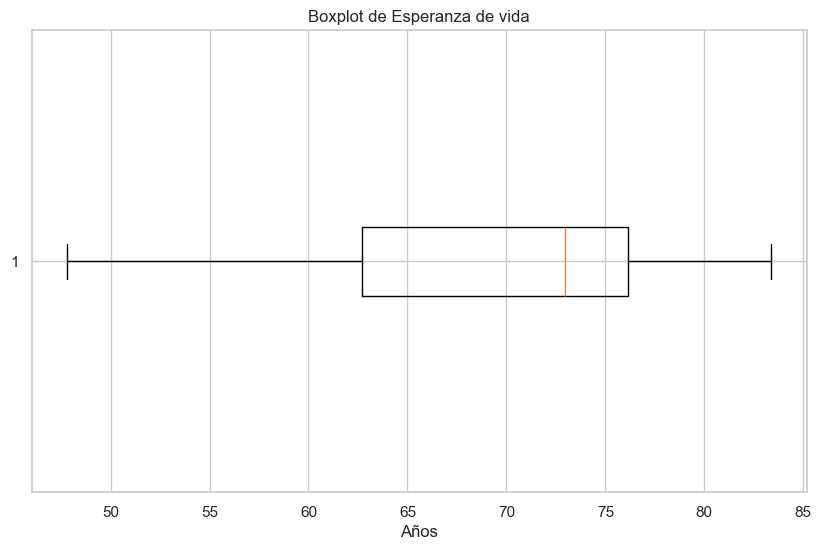

In [649]:
plt.figure(figsize=(10, 6))
plt.boxplot(politicas1_df["lifeexpectancy"].dropna(), vert=False)
plt.title("Boxplot de Esperanza de vida")
plt.xlabel("Años")
plt.show()

No existen outliers o problemas de consistencia en esta variable numérica. Todos las entradas cuentan con valores que tienen sentido.

In [650]:
politicas1_df["polityscore"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    167.000000
mean       3.502994
std        6.423671
min      -10.000000
5%        -7.000000
25%       -2.500000
50%        6.000000
75%        9.000000
95%       10.000000
max       10.000000
Name: polityscore, dtype: float64

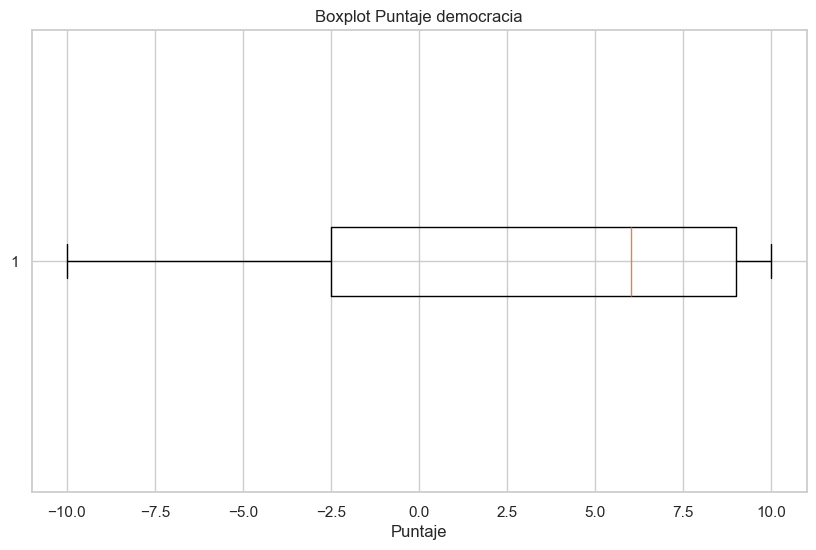

In [651]:
plt.figure(figsize=(10, 6))
plt.boxplot(politicas1_df["polityscore"].dropna(), vert=False)
plt.title("Boxplot Puntaje democracia")
plt.xlabel("Puntaje")
plt.show()

No existen outliers o problemas de consistencia en esta variable numérica. Todos las entradas cuentan con valores que tienen sentido.

In [652]:
politicas1_df["alcconsumption"].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95])

count    178.000000
mean       6.753539
std        5.139950
min        0.030000
5%         0.337000
25%        2.445000
50%        5.920000
75%        9.990000
95%       16.300000
max       23.010000
Name: alcconsumption, dtype: float64

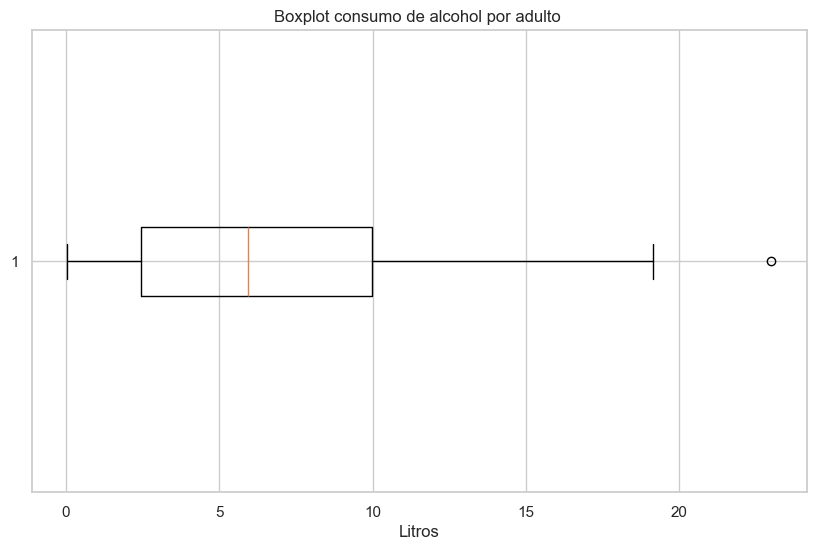

In [653]:
plt.figure(figsize=(10, 6))
plt.boxplot(politicas1_df["alcconsumption"].dropna(), vert=False)
plt.title("Boxplot consumo de alcohol por adulto ")
plt.xlabel("Litros")
plt.show()

Existen outliers considerables para esta variable, sin embargo, se debe tener en cuenta que a priori que la emision de CO2 es clave para la prediccion de nuestra variable en pro de mejora del PIB

## Incersión de variable categórica

Revisando la información del portal de Gapminder, se determinó incluir la variable categorica "HDI" (Human Developed Index) el cual nos muestra si el país es:
- HIGH HUMAN DEVELOPMENT
- LOW HUMAN DEVELOPMENT
- MEDIUM HUMAN DEVELOPMENT
- VERY HIGH HUMAN DEVELOPMENT

Se tomo esa disposición debido a que este indice a priorí podría incidir de forma significativa en mejorar nuestros indicadores que a su vez ayuden a mejorar el PIB

Modificamos nuestro dataset inicial con dicha variables y mostraremos brevemente la info del dataset relacionada

In [654]:
politicas_df = pd.read_csv("./data/gapminder_final_adicionado.csv", sep=",")

In [655]:
politicas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               178 non-null    object 
 1   incomeperperson       175 non-null    float64
 2   alcconsumption        178 non-null    float64
 3   armedforcesrate       174 non-null    float64
 4   breastcancerper100th  177 non-null    float64
 5   co2emissions          176 non-null    float64
 6   femaleemployrate      177 non-null    float64
 7   hivrate               155 non-null    float64
 8   internetuserate       174 non-null    float64
 9   lifeexpectancy        178 non-null    float64
 10  oilperperson          67 non-null     float64
 11  polityscore           167 non-null    float64
 12  relectricperperson    141 non-null    float64
 13  suicideper100th       178 non-null    float64
 14  employrate            177 non-null    float64
 15  urbanrate             1

In [656]:
politicas_df.shape

(178, 17)

In [657]:
politicas_df.sample(5)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,HDI
162,Guinea-Bissau,161.317137,3.90,0.930108,28.1,7.813667e+06,49.900002,2.50,2.450362,48.132,NaN,6.0,NaN,7.563692,65.900002,29.84,LOW HUMAN DEVELOPMENT
166,Luxembourg,52301.587180,12.84,0.731336,82.5,5.920127e+08,45.900002,0.30,90.079527,79.963,NaN,NaN,1566.106139,12.405918,53.500000,82.44,VERY HIGH HUMAN DEVELOPMENT
78,Slovak Republic,8445.526689,13.31,0.628578,48.0,5.906743e+08,45.299999,0.06,79.889777,75.446,0.677393,10.0,830.701647,10.645740,53.400002,56.56,MEDIUM HUMAN DEVELOPMENT
135,Bosnia and Herzegovina,2183.344867,9.60,0.462847,58.9,2.364193e+08,34.900002,NaN,52.002061,75.670,NaN,NaN,927.119497,11.836716,41.200001,47.44,HIGH HUMAN DEVELOPMENT
15,Bolivia,1232.794137,5.78,1.882198,24.7,2.549397e+08,61.599998,0.20,20.001710,66.618,NaN,7.0,213.061614,2.034178,70.400002,65.58,MEDIUM HUMAN DEVELOPMENT


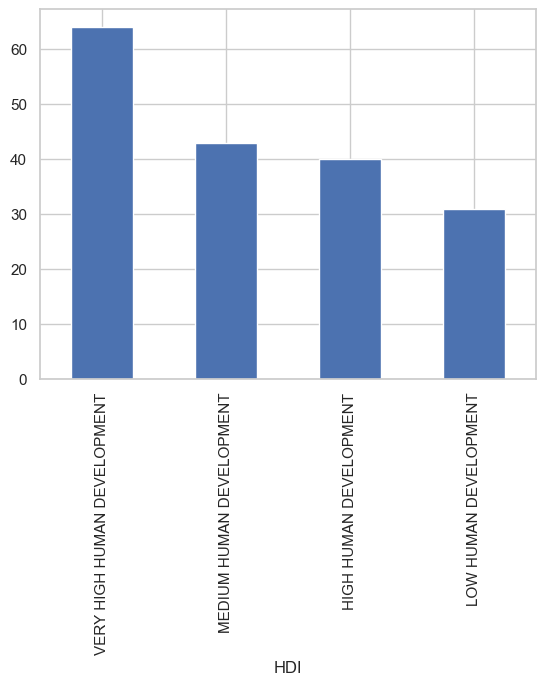

In [658]:
politicas_df["HDI"].value_counts().plot(kind="bar")
plt.show()

## Análisis multivariado

Con base a nuestro top 5 de variables, procederemos a realizar análisis entre ellas con el fin de encontrar una mayor información acerca de las mismas

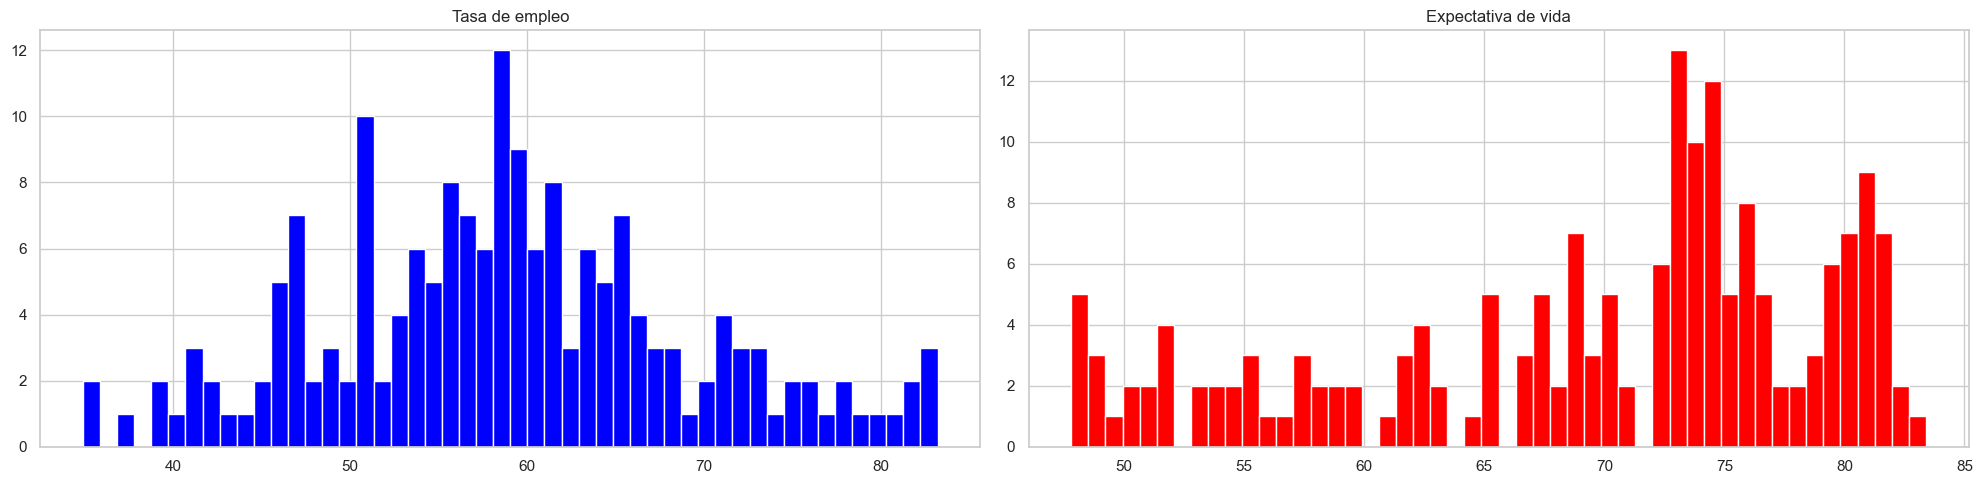

In [659]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

ax1.hist(politicas_df["employrate"], bins=50, color="blue")
ax1.set_title("Tasa de empleo")
ax2.hist(politicas_df["lifeexpectancy"], bins=50, color="red")
ax2.set_title("Expectativa de vida")

plt.tight_layout()
plt.show()

Ambas variables cuentan casi con la totalidad de sus datos (consistencia). La tasa de empleo cuenta con una distribución similar a la forma de campana.

<function matplotlib.pyplot.show(close=None, block=None)>

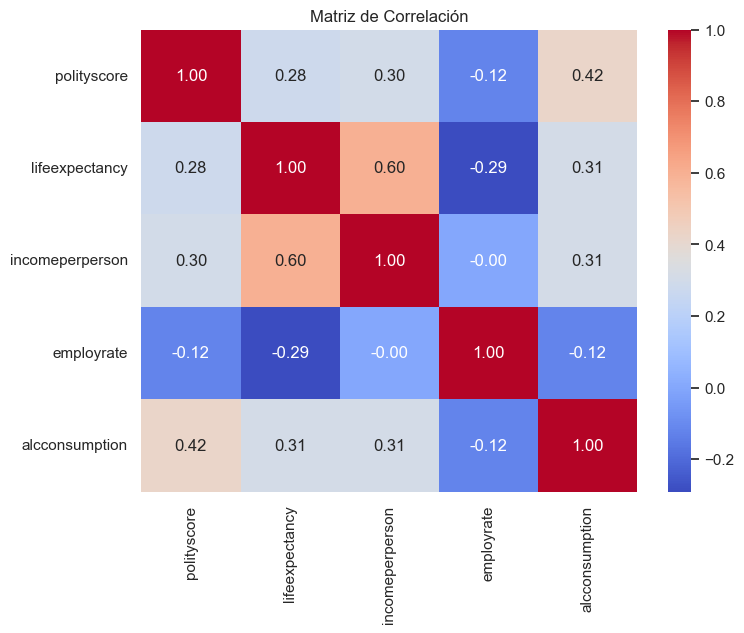

In [660]:
selected_columns = ['polityscore', 'lifeexpectancy', 'incomeperperson', 'employrate', 'alcconsumption']

# Crear un DataFrame con las columnas seleccionadas
correlation_df = politicas_df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show

Podemos ver que la variables "incomeperperson" tiene la mayor correlacion la cual está con la variable "lifeexpectative", esto nos da indicios que ambas variables pueden contribuir en solución a nuestro problema

## [25%] Preparación de datos

El dataset no cuenta con errores de digitación en sus datos ya que la totalidad de los datos son tipo float, por lo cual, la calidad de los datos va a realizarse desde el punto de vista de variables cuantitativas

### Depueración de registros dupicados
Un modelo de machine Learning supervisado se debe verificar si existen registros duplicados, por lo cual se deben depuerar 

In [661]:
politicas_df.duplicated().sum()

11

In [662]:
politicas_df.shape

(178, 17)

In [663]:
politicas_df.drop_duplicates(subset=features, inplace=True)

### Ponderación de valores nulos

Debido a que nuestro modelo no permite valores nulos, al ser tan pocos los valores faltantes procedemos a usar el promedio para inputar los datos fatantes

In [664]:
imputer = SimpleImputer(strategy='mean')

columnas_numericas = ['polityscore', 'lifeexpectancy', 'incomeperperson', 'employrate', 'alcconsumption']

politicas_df[columnas_numericas] = imputer.fit_transform(politicas_df[columnas_numericas])

print(politicas_df.isnull().sum())

country                   0
incomeperperson           0
alcconsumption            0
armedforcesrate           4
breastcancerper100th      1
co2emissions              2
femaleemployrate          1
hivrate                  22
internetuserate           3
lifeexpectancy            0
oilperperson            105
polityscore               0
relectricperperson       36
suicideper100th           0
employrate                0
urbanrate                 0
HDI                       0
dtype: int64


## outliners

In [665]:
politicas_df.loc[politicas_df.duplicated(subset=features, keep=False)].head(3)

,country,incomeperperson,alcconsumption,armedforcesrate,breastcancerper100th,co2emissions,femaleemployrate,hivrate,internetuserate,lifeexpectancy,oilperperson,polityscore,relectricperperson,suicideper100th,employrate,urbanrate,HDI


In [666]:
#outliners

def handle_outliers(politic_df, column_name):
    # Calcula el valor medio y la desviación estándar
    mean = politic_df[column_name].mean()
    std = politic_df[column_name].std()
    
    threshold = 3 * std
    
    # Filtra los valores atípicos
    df_filtered = politic_df[(politic_df[column_name] >= mean - threshold) & (politic_df[column_name] <= mean + threshold)]
    
    return df_filtered

In [667]:
politicas_no_outliers_df = politicas_df.loc[politicas_df["incomeperperson"] <= politicas_df["incomeperperson"].quantile(.7)]

In [668]:
politicas_no_outliers_df.shape

(116, 17)

## [30%] Entrenamiento del modelo de regresión:

<span style="color: red;"> Revisando las metricas de cada una de las variables y conociendo que necesitamos tener un indicador que mejore indirectamente al PIB, utilizaremos "employrate" como nuestra variable objetivo.

### Particionamiento  de datos

Al ser un dataset relativamente pequeño, utilizaremos el 20% de nuestros datos para el entrenamiento

In [669]:
features = ['polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption']
target = 'employrate'

X = politicas_df[features]
y = politicas_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)


Dimensiones del conjunto de entrenamiento (X_train, y_train): (132, 4) (132,)
Dimensiones del conjunto de prueba (X_test, y_test): (34, 4) (34,)


In [670]:
X_train.shape, y_train.shape

((132, 4), (132,))

In [671]:
X_test.shape, y_test.shape

((34, 4), (34,))

## Escalamiento y entrenamiento del modelo

In [672]:
scaler = StandardScaler()

In [673]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [674]:
model = LinearRegression()

In [675]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [676]:
coefficients_df = pd.concat([
    pd.Series(features),
    pd.Series(model.coef_)
], axis=1).rename(columns={0: "feature", 1: "value"})
coefficients_df

,feature,value
0,polityscore,-0.879975
1,lifeexpectancy,-4.858273
2,incomeperperson,2.811169
3,alcconsumption,-0.932957


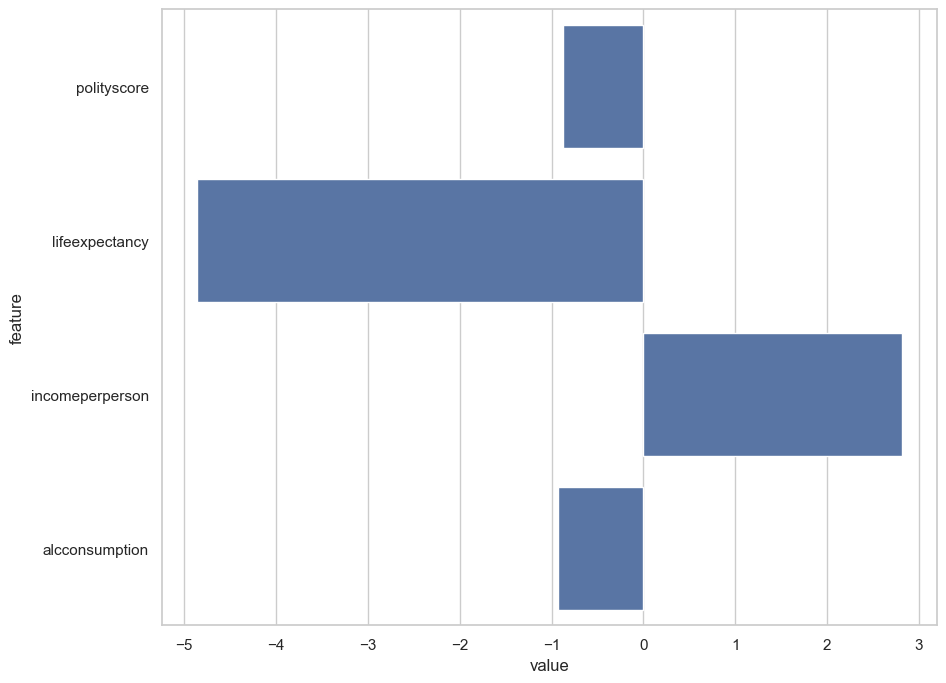

In [677]:
plt.figure(figsize=(10, 8))
sns.barplot(
    y=coefficients_df["feature"],
    x=coefficients_df["value"],
    orient="h"
)
plt.show()

- polityscore: Una disminución en el puntaje de la democracia conllevaria en el aumento de la tasa de empleo
- lifeexpectancy: Un disminución en la esperanza de vida se asocia con un aumento de la tasa de empleo
- incomeperperson: Un aumento en el ingreso por persona se asocia con el aumento de la tasa de empleo
- alcconsumption: Una disminución en el consumo de alcohol per cápita tiene un efecto positivo en la tasa de empleo

In [678]:
model.intercept_

59.701432663615705

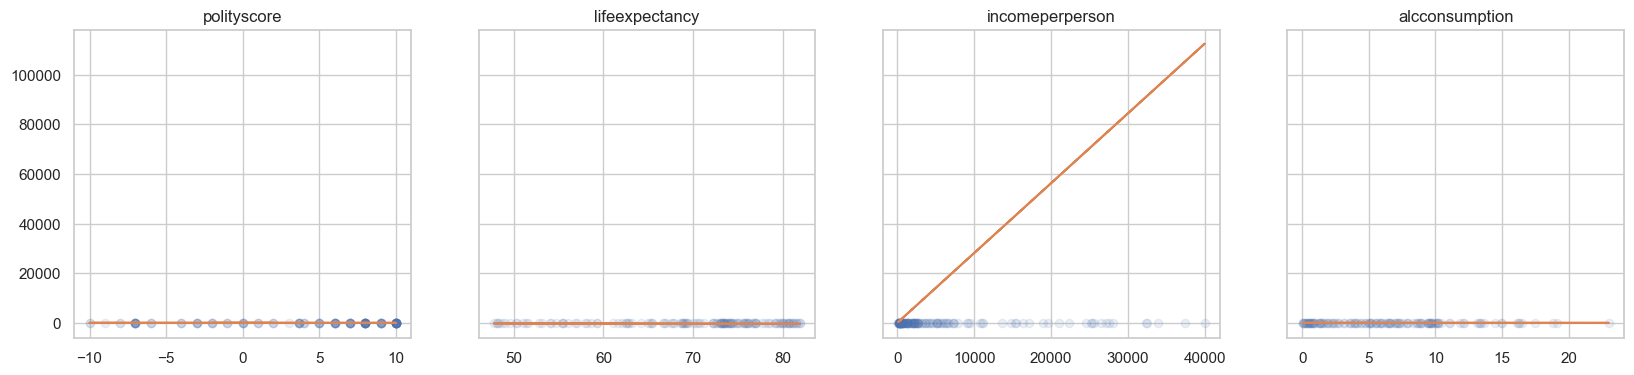

In [679]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = model.coef_[i]
    b = model.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

### Evalación del modelo

In [680]:
preds_train = model.predict(X_train_scaled)
preds_test = model.predict(X_test_scaled)

In [681]:
print("MAE train:", mean_absolute_error(y_train, preds_train))
print("MAE test:", mean_absolute_error(y_test, preds_test))

MAE train: 7.365956489573075
MAE test: 7.70472338062861


In [682]:
print("RMSE train:", np.sqrt(mean_squared_error(y_train, preds_train)))
print("RMSE test:", np.sqrt(mean_squared_error(y_test, preds_test)))

RMSE train: 9.415893602759672
RMSE test: 10.18031069519007


In [683]:
print("R2 score:", r2_score(y_train, preds_train))

R2 score: 0.18303304240199825


In [684]:
(y_test - preds_test).describe(percentiles=[.25, .5, .75, .95, .99])

count    34.000000
mean     -3.648615
std       9.646942
min     -22.787646
25%      -8.668484
50%      -2.149590
75%       2.365899
95%      10.224022
99%      16.673014
max      19.009479
Name: employrate, dtype: float64

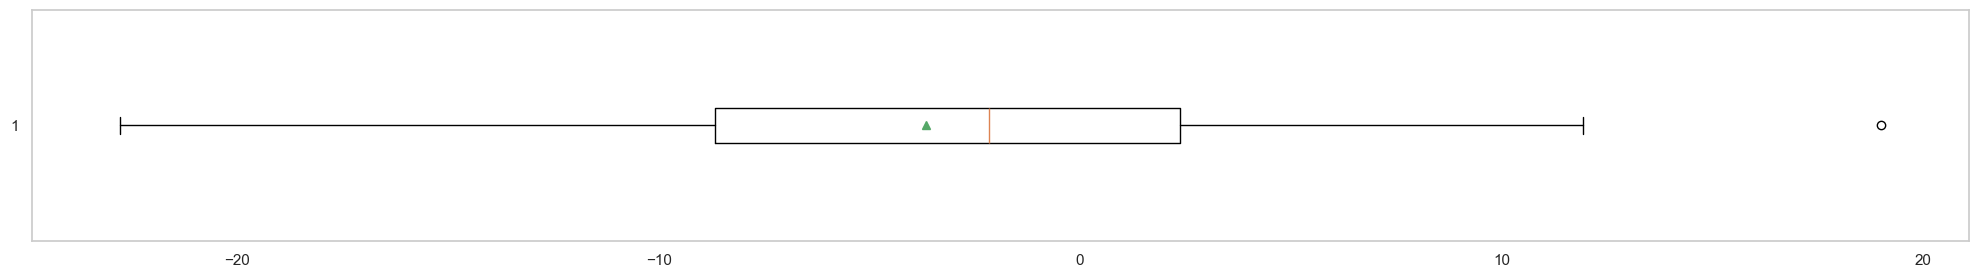

In [685]:
plt.figure(figsize = (25, 3))
plt.boxplot((y_test - preds_test), showmeans=True, vert=False)
plt.grid()
plt.show()

Se podría decir que los resultados de este primer modelo son aceptables dado que:

1) Las métricas de error para el dataset de entrenamiento y prueba son similares.
2) Se evidencia que la mayoria de los datos se encuentran por debajo del 0 (overfitting)
3) El RMSE train: 9.4158 y RMSE test: 10.180 manejan dicho orden, mientras que el interceot del modelo está por el orden de 10.180, adicional el R2= 0.1830

## Validación de supuestos

### Colinealidad
Se valida que haya una colinealidad baja entre las variables

<function matplotlib.pyplot.show(close=None, block=None)>

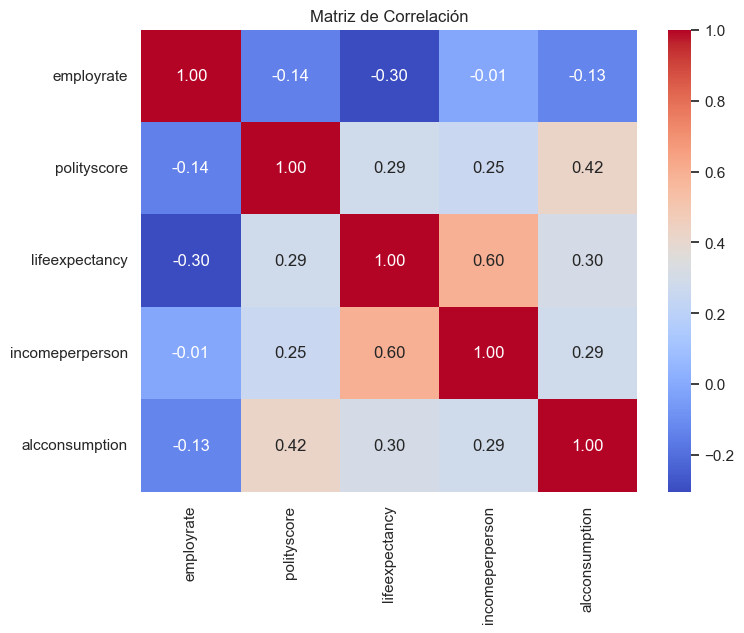

In [686]:
selected_columns = ['employrate', 'polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption'] 
# Crear un DataFrame con las columnas seleccionadas
correlation_df = politicas_df[selected_columns]

# Calcular la matriz de correlación
correlation_matrix = correlation_df.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show

In [687]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [688]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [689]:
selected_columns = ['polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption'] 

In [690]:
pd.DataFrame({"columns": selected_columns, "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,-0.879975
1,lifeexpectancy,-4.858273
2,incomeperperson,2.811169
3,alcconsumption,-0.932957


In [691]:
pipeline["model"].intercept_

59.701432663615705

In [692]:
y_train.mean(), y_test.mean()

(59.701432663615705, 57.19999952911765)

In [693]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[selected_columns])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[selected_columns])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[selected_columns]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[selected_columns]))))

MAE:
Train: 7.365956489573075
Test: 7.70472338062861

RMSE:
Train: 9.415893602759672
Test: 10.18031069519007


Como se puede ver las variables en primera instancia no tenian alta correlación entre ellas lo cual nos garantiza la no redundancia de información y a su vez el cumplimiento de este supuesto 

## Linealidad

In [694]:
features2 = ['polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption'] 

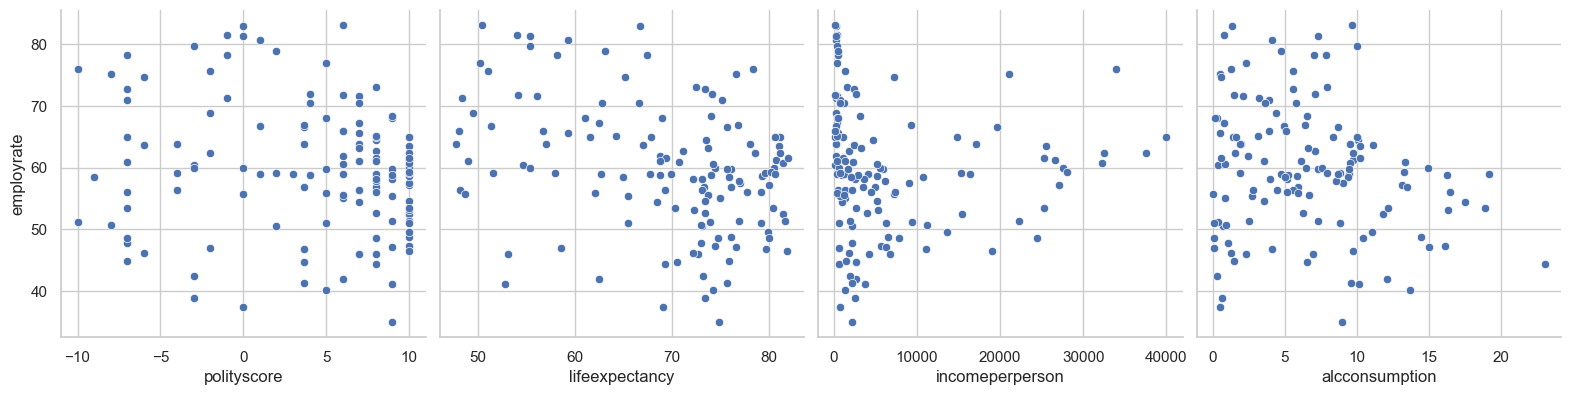

In [695]:
sns.pairplot(pd.concat([X_train, y_train], axis=1), height=4, y_vars="employrate", x_vars=features2, kind="scatter")

In [696]:
pipeline = Pipeline(
    [
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [697]:
pipeline.fit(X_train[features2], y_train)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('model', LinearRegression())])

In [698]:
pd.DataFrame({"columns": pipeline["poly"].get_feature_names_out(), "coef": pipeline["model"].coef_})

,columns,coef
0,polityscore,-10.660007
1,lifeexpectancy,29.478886
2,incomeperperson,-62.520854
3,alcconsumption,-6.347986
4,polityscore^2,-0.065702
5,polityscore lifeexpectancy,13.423637
6,polityscore incomeperperson,-5.886783
7,polityscore alcconsumption,-3.257690
8,lifeexpectancy^2,-39.442940
9,lifeexpectancy incomeperperson,69.969840


Con base a estos nuevos coeficientes visualizaremos para entenderlos de forma más clara

C:\Users\Usuario\AppData\Local\Temp\ipykernel_3608\212394630.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="coeficiente", y="nombre", data=coef_df, orient="h", palette="viridis")


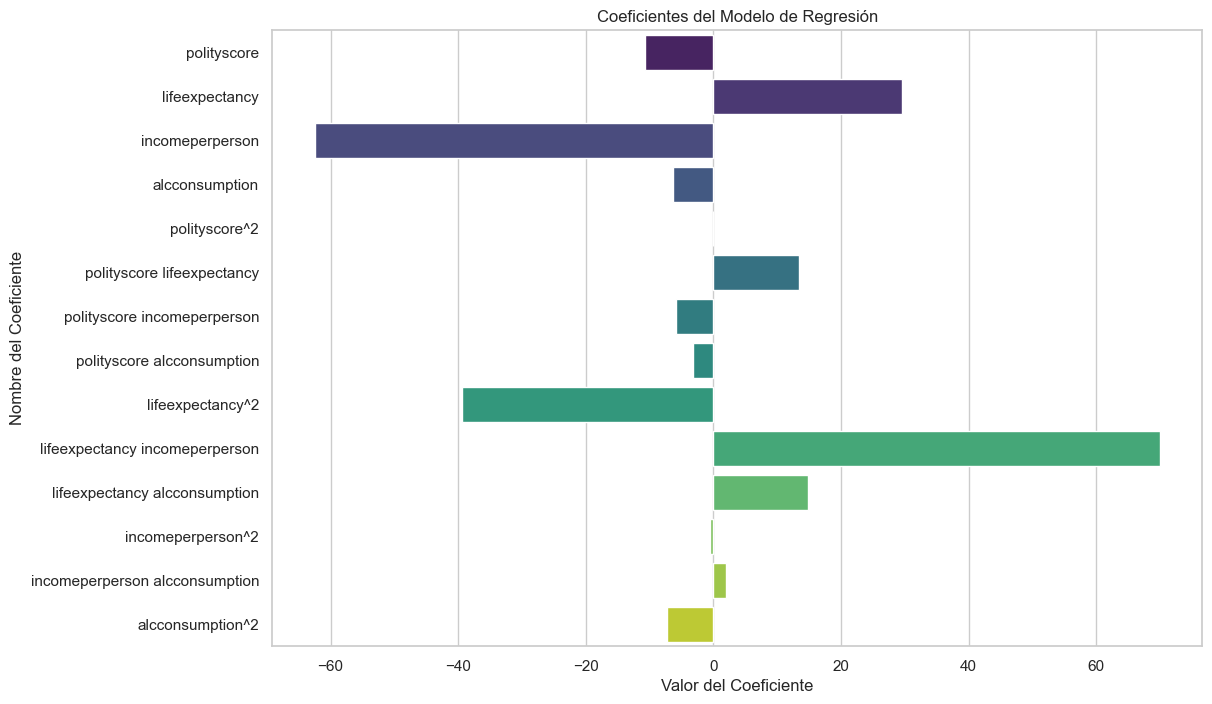

In [699]:
coeficientes = [-10.660007, 29.478886, -62.520854, -6.347986, -0.065702, 13.423637, -5.886783, -3.257690, -39.442940, 69.969840, 14.882074, -0.598142, 1.883267, -7.321722]

nombres_coeficientes = [
    'polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption',
    'polityscore^2', 'polityscore lifeexpectancy', 'polityscore incomeperperson', 'polityscore alcconsumption',
    'lifeexpectancy^2', 'lifeexpectancy incomeperperson', 'lifeexpectancy alcconsumption',
    'incomeperperson^2', 'incomeperperson alcconsumption', 'alcconsumption^2'
]

coef_df = pd.DataFrame({"coeficiente": coeficientes, "nombre": nombres_coeficientes})

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.barplot(x="coeficiente", y="nombre", data=coef_df, orient="h", palette="viridis")
plt.title("Coeficientes del Modelo de Regresión")
plt.xlabel("Valor del Coeficiente")
plt.ylabel("Nombre del Coeficiente")
plt.show()

In [700]:
print("MAE:")
print("Train:", mean_absolute_error(y_train, pipeline.predict(X_train[features2])))
print("Test:", mean_absolute_error(y_test, pipeline.predict(X_test[features2])))
print("\nRMSE:")
print("Train:", np.sqrt(mean_squared_error(y_train, pipeline.predict(X_train[features2]))))
print("Test:", np.sqrt(mean_squared_error(y_test, pipeline.predict(X_test[features2]))))

MAE:
Train: 6.439155538699276
Test: 8.595343740707058

RMSE:
Train: 8.277431922969836
Test: 11.625435343262694


El uso de la transformación polinómica  no garantizó la mejora en los errores

## Normalidad de los errores

In [702]:
pipeline = Pipeline(
    [
        ("scaler", StandardScaler()),
        ("model", LinearRegression())
    ]
)

In [703]:
pipeline.fit(X_train[selected_columns], y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [704]:
errors = (pipeline.predict(X_train[selected_columns])-y_train).values

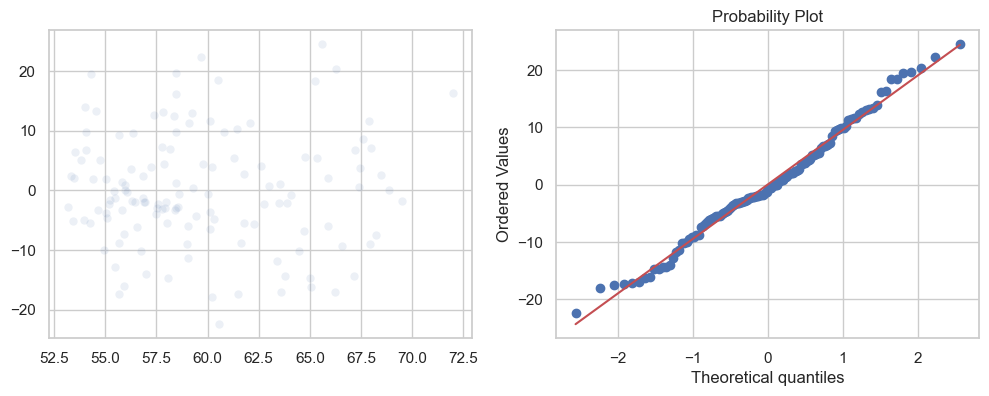

In [705]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Dispersión
sns.scatterplot(x=pipeline.predict(X_train[selected_columns]), y=errors, alpha=0.1, ax=axes[0])

# q-q plot
_ = stats.probplot(errors, dist="norm", plot=axes[1])

Aunque ya se realizó la depuración de atípicos Se siguen teniendo mejoras en las métricas de error y se resuelve el problema de no normalidad de los errores.

## [25%] Generación de resultados:

En el dataset entregado se encontraban variables (CO2emission) que en primera medida se creían importantes para determinar los indicadores que mejoren la apreciación del país ante el banco mundial, hechos los análisis se verifico que variables como la tasa de consumo de alcohol, la esperanza de vida y el puntaje de la politica tenían un peso importante en la mejora de la tasa de empleo que sería nuestro indicador clave. Aunque se obtuvo unos resultados validos en las métricas de los errores con base a los coeficientes y el intercepto, no se pudo validar a cabalidad el cumplimiento de los supuestos de regresión.

Las políticas públicas a implementar con base a nuestros indicadores son:

- *Promoción del empleo y el emprendimiento:* Implementar políticas que fomenten la creación de empleo, como incentivos para la contratación de trabajadores, capacitación laboral y apoyo a pequeñas y medianas empresas. Un alto nivel de empleo ('employrate') contribuye al aumento de la producción económica.
- *Estabilidad política y seguridad jurídica:* Mantener un ambiente político estable y un sistema jurídico confiable ('polityscore') es fundamental para atraer inversiones y promover el crecimiento económico. La estabilidad política reduce la incertidumbre y fomenta la inversión.
- *Mejora de la atención médica y la esperanza de vida:* Políticas de salud pública que aumenten la esperanza de vida ('lifeexpectancy') pueden tener efectos positivos en la fuerza laboral y la productividad. La población más saludable es más productiva y tiene menos ausencias laborales.
- *Fomento de la educación y capacitación:* Invertir en educación y capacitación de la fuerza laboral puede aumentar la cualificación de los trabajadores ('incomeperperson'). Esto puede llevar a un aumento de la productividad y a salarios más altos, lo que a su vez estimula el consumo y el crecimiento económico.


## Conclusiones

Aunque nuestra variable objetivo en primera medida era el PIB, al no contar con dicha variable, se dedujo con el análisis realizado que la tasa de empleo serviria como indicador que a su vez mejore el PIB.

En un principio se tomo un top 5 diferente al dispuesto en el inicio del proyecto, realizados algunos análisis de concluyó que las variables más indicadas en este ejercicio son: ['polityscore', 'lifeexpectancy', 'incomeperperson', 'alcconsumption']
